### HW4 ###
- General data -
- Linear Regression -
- Augmented regression -
- Logistic regression -

範例一：

### General data ###

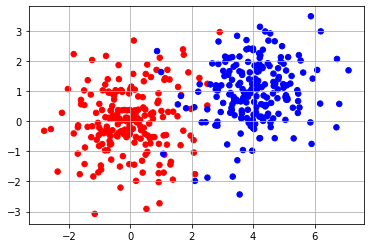

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))

y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('hw4_data.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

自己算法

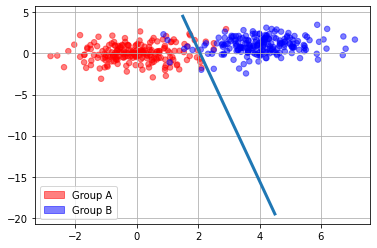

In [27]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# 1. load data
data_dir = '/Users/liang/Downloads/ml_data/'
D = np.loadtxt('hw4_data.txt', comments='#')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
n = len(D[:, 0])
X = np.hstack((np.ones((n, 1)), D[:, 0:2]))
# X = np.c((np.ones(n), D[:, 0:2]))#np.c會自己幫你決定np.ones的size
y = D[:, 2]#第二行
b = LA.inv(X.T @ X) @ X.T @ y.T
# Draw a linear regression line
x = np.array([1.5, 4.5])
y_hat = -(b[0] - 0.5 + b[1] * x) / b[2]
plt.plot(x, y_hat, lw=3)
plt.show()

套件 LinearRegression() 法

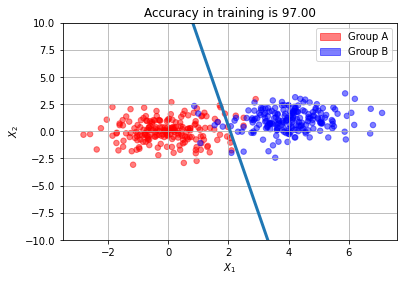

In [158]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# 1. load data
data_dir = '/Users/liang/Downloads/ml_data/'
D = np.loadtxt('hw4_data.txt', comments='#')#讓第一列不要讀進去
# 2. Scatter plot
# ---p define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
# plt.savefig('.eps', format='eps')

#--------------------------------------------------------------

from sklearn.linear_model import LinearRegression
# Linear Regression by sklearn
Mdl = LinearRegression()# 建 立 新 的 linear regression model Mdl.fit(X, y) # 進行估計 ( 配適 )
X= D[:, 0:2]
y=D[:,2]
Mdl.fit(X,y)
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估 計 結 果 :beta0
coeffs = Mdl.coef_ # # 估 計 結 果 :beta1, beta2, ...
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format( \
        100 * np.mean(y_pre == y)))
plt.ylim(-10,10)        
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
plt.show() 


Augmented regression增廣法

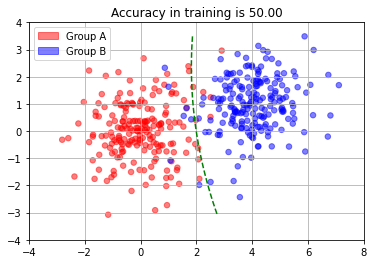

In [128]:

import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 1. load data
data_dir = '/Users/liang/Downloads/ml_data/'
D = np.loadtxt( 'hw4_data.txt', comments='#')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
# plt.savefig('hw4_data.eps', format='eps')

#--------------------------------------------------------------

# Augmented regression line by a contour line at 0.5 
x1=D[:,0:1] #nx1vector
x2 = D[:, 1:2]
n=400
X1 = np.hstack((np.ones((n, 1)), \
        x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(X1) @ y # pseudo inverse 
f=(
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
y_hat=np.zeros(400)
for i in np.arange(400):
        hat=f(X1[i,1:3])
        y_hat[i]=hat
y_pre=[1 if i>0.5 else 0 for i in y_hat]        
contours = plt.contour(
    X, Y, Z, levels = [0.5],colors='g', linestyles='--')
plt.ylim(-4,4),plt.xlim(-4,8)
plt.title('Accuracy in training is {:.2f}'.format( \
        100 * np.mean(y_pre == y)))    
# plt.title('Linear and Augmented Regression lines')
plt.show()

增廣套件法

[0.11465425]
[[ 0.00000000e+00  1.95491235e-01  2.79767691e-02  5.52066593e-05
  -1.19479187e-03 -5.95322076e-03]]


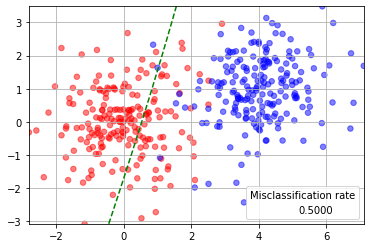

In [88]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# 1. load data
D = np.loadtxt( 'hw4_data.txt', comments='#')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
# plt.savefig(img_dir+'la1.eps', format='eps')
#------------------------------------------------------
Mda = LinearRegression()
n=400
y = D[:, 2:3]
x1, x2 = D[:, 0:1], D[:, 1:2]
X = np.hstack((np.ones((n, 1)), \
        x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
Mda.fit(X, y)
y_hat = Mda.predict(X)
# convert y_hat to group number 0, 1
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
misclassification_rate = 1 - np.mean(y_pre == y) # 列印出估計的參數
intrcp = Mda.intercept_
coeffs = Mda.coef_
print(intrcp)
print(coeffs)
#  繪 製 linear regression line 
# plt.plot(x, f, lw=3, \
#         label = '{:.4f}'.format(1 - np.mean(y_pre == y)))
#  繪 製 augmented regression line 
contours = plt.contour(
    xx, yy, Z, levels = [0.5], colors='g', linestyles='--'
)
contours.collections[0].set_label(\
        '{:.4f}'.format(1 - np.mean(y_pre == y)))
plt.legend(title = 'Misclassification rate')  


範例二：

LinearRegression()方法

In [50]:
img_dir="/Users/liang/Documents/統計數學與運算/images/"

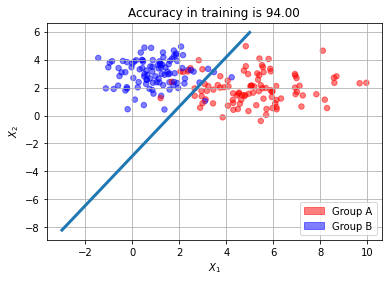

In [65]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# 1. load data
data_dir = '/Users/liang/Downloads/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
# plt.savefig(img_dir+'la1.eps', format='eps')
#------------------------------------------------------
from sklearn.linear_model import LinearRegression
# Linear Regression by sklearn
Mdl = LinearRegression()# 建 立 新 的 linear regression model Mdl.fit(X, y) # 進行估計 ( 配適 )
X= D[:, 0:2]
y=D[:,3]
Mdl.fit(X,y)
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估 計 結 果 :beta0
coeffs = Mdl.coef_ # # 估 計 結 果 :beta1, beta2, ...
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format( \
        100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
plt.show() 

增廣法

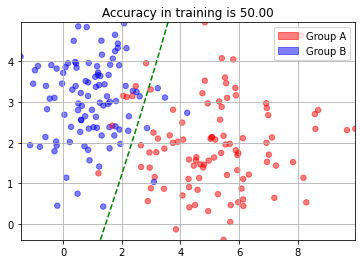

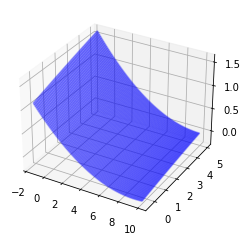

In [64]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 1. load data
data_dir = '/Users/liang/Downloads/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
# plt.savefig(img_dir+'la3.eps', format='eps')
#--------------------------------------------------------------
# Augmented regression line by a contour line at 0.5 
x1=D[:,0:1] #nx1vector
x2 = D[:, 1:2]
n=200
X = np.hstack((np.ones((n, 1)), \
        x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(X) @ y # pseudo inverse 
f=(
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
    X, Y, Z, levels = [0.5],colors='g', linestyles='--')
# plt.title('Linear and Augmented Regression lines')
plt.show()
#------------------------------------------------------
#立體圖
ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,color='blue',alpha=0.3,rstride=1,cstride=1)

增廣套件法

[0.80512512]
[[ 0.         -0.2286953   0.09429359 -0.00426394  0.01248858 -0.00158681]]


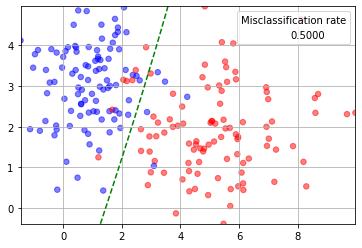

In [153]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 1. load data
data_dir = '/Users/liang/Downloads/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)

x1=D[:,0:1] #nx1vector
x2 = D[:, 1:2]
n=200
X = np.hstack((np.ones((n, 1)), \
        x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(X) @ y # pseudo inverse 
f=(
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
# contours = plt.contour(
#     X, Y, Z, levels = [0.5],colors='g', linestyles='--')

Mda = LinearRegression()
n=200
y = D[:, 2:3]
x1, x2 = D[:, 0:1], D[:, 1:2]
X = np.hstack((np.ones((n, 1)), \
        x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
Mda.fit(X, y)
y_hat = Mda.predict(X)
# convert y_hat to group number 0, 1
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
misclassification_rate = 1 - np.mean(y_pre == y) # 列印出估計的參數
intrcp = Mda.intercept_
coeffs = Mda.coef_
print(intrcp)
print(coeffs)
#  繪 製 linear regression line 
Mdl = LinearRegression()# 建 立 新 的 linear regression model Mdl.fit(X, y) # 進行估計 ( 配適 )
Mdl.fit(X,y)
intrcp1 = Mdl.intercept_ # 估 計 結 果 :beta0
coeffs1 = Mdl.coef_ # # 估 計 結 果 :beta1, beta2, ...
# Draw a regression line
# x = np.array([-3, 5])
# w = -(intrcp1 - 0.5 + coeffs1[0] * x) / coeffs1[1]
# plt.plot(x, w, lw=3, \
#         label = '{:.4f}'.format(1 - np.mean(y_pre == y)))
#  繪 製 augmented regression line 
contours = plt.contour(
    xx, yy, Z, levels = [0.5], colors='g', linestyles='--'
)
contours.collections[0].set_label(\
        '{:.4f}'.format(1 - np.mean(y_pre == y)))
plt.legend(title = 'Misclassification rate')  

[0.80512512]
[[ 0.         -0.2286953   0.09429359 -0.00426394  0.01248858 -0.00158681]]


IndexError: index 1 is out of bounds for axis 0 with size 1

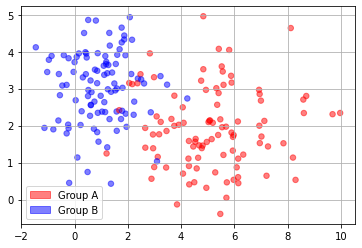

In [165]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# 1. load data
D = np.loadtxt( '/Users/liang/Downloads/ml_data/la_1.txt', comments='%')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
# plt.savefig(img_dir+'la1.eps', format='eps')
#------------------------------------------------------
Mda = LinearRegression()
n=200
y = D[:, 2:3]
x1, x2 = D[:, 0:1], D[:, 1:2]
X = np.hstack((np.ones((n, 1)), \
        x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
Mda.fit(X, y)
y_hat = Mda.predict(X)
# convert y_hat to group number 0, 1
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
misclassification_rate = 1 - np.mean(y_pre == y) # 列印出估計的參數
intrcp = Mda.intercept_
coeffs = Mda.coef_
print(intrcp)
print(coeffs)

X1= D[:, 0:2]
Mdl = LinearRegression()# 建 立 新 的 linear regression model Mdl.fit(X, y) # 進行估計 ( 配適 )
Mdl.fit(X1,y)
intrcp1 = Mdl.intercept_ # 估 計 結 果 :beta0
coeffs1 = Mdl.coef_ # # 估 計 結 果 :beta1, beta2, ...
# Draw a regression line

# Calculate testing error
y_hat = Mdl.predict(X1) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat]


x = np.array([-3, 5])
f = -(intrcp1 - 0.5 + coeffs1[0] * x) / coeffs1[1]


plt.plot(x, f, lw=3, \
        label ='{:.4f}'.format(1 - np.mean(y_pre == y)))
#  繪 製 augmented regression line 
contours = plt.contour(
    xx, yy, Z, levels = [0.5], colors='g', linestyles='--'
)
contours.collections[0].set_label(\
        '{:.4f}'.format(1 - np.mean(y_pre == y)))
plt.legend(title = 'Misclassification rate')  

[0.3290614]
[[-0.022636    0.24959834]]


IndexError: index 2 is out of bounds for axis 0 with size 2

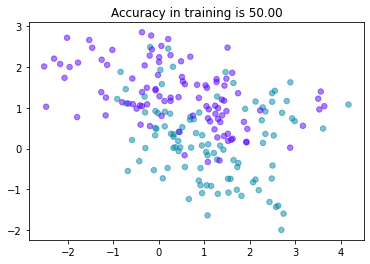

In [175]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# data_dir = '../ml_data/'
s=30
D = np.loadtxt( '/Users/liang/Downloads/ml_data/la_3.txt', comments='%')
colors = ['#0088A8' if i == 0 else '#5500FF' for i in D[:,2]]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
marker = 'o', alpha = 0.5)
x = np.array([-3, 5])
X2 = np.c_[np.ones(n),D[:,0:2]]
y2 = D[:, 2]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
x2 = np.array([1.5, 4.5])
yhat2 = -(b2[0] - 0.5 + b2[1] * x2) / b2[2]
# plt.plot(x, yhat2, lw=3)
n = len(D[:, 0])
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]

b = LA.pinv(X) @ y # pseudo inverse
f = (
lambda x: b[0]
+ b[1] * x[0]   
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(-4, 7, 100)
yy = np.linspace(-4, 10, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
# contours = plt.contour(
# X, Y, Z, levels = [0.5], colors='g', linestyles='--')
# plt.title('Linear and Augmented Regression lines')
# plt.show()


X2 = D[:,0:2]
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X2, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp2 = Mdl.intercept_ # 估計結果 ：beta0
coeffs2 = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp2)  
print(coeffs2)
y_hat = Mdl.predict(X2) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format( \
        100 * np.mean(y_pre == y)))

f2 = -(intrcp2[0] - 0.5 + coeffs2[0][1] * x) / coeffs2[0][2]
#  繪 製 linear regression line 
plt.plot(x, f2, lw=3, \
        label = '{:.4f}'.format(1 - np.mean(y_pre == y)))
#  繪 製 augmented regression line 
contours = plt.contour(
    xx, yy, Z, levels = [0.5], colors='g', linestyles='--'
)
contours.collections[0].set_label(\
        '{:.4f}'.format(1 - np.mean(y_pre == y)))
plt.legend(title = 'Misclassification rate')  
# plt.plot(x, f2, lw=3)
plt.show()

In [176]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt

# 1. load data
data_dir = 'D:/NTPU/latex/python/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
#---------------------
# area = 50 + D[:,2]
colors = ['blue' if i == 0 else 'red' for i in D[:,2]]
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.grid(True)
#-------------------------------------------
# Augmented regression line by a contour line at 0.5
#一般型
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = D[:,0:2]
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)


#增廣型-----
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
print("accuracy in training for linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-3, 4, 100)
yy = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.title('Linear and Augmented Regression lines')
plt.show()

FileNotFoundError: D:/NTPU/latex/python/la_3.txt not found.

分割

In [ ]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. load data
# data_dir = 'D:/NTPU/latex/python/'
D = np.loadtxt( '/Users/liang/Downloads/ml_data/la_3.txt', comments='%')
train_data, test_data = train_test_split(D, random_state=777, train_size=0.8)
#---------------------
# area = 50 + D[:,2]
colors = ['blue' if i == 0 else 'red' for i in D[:,2]]
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.grid(True)
#-------------------------------------------
#一般型
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = D[:,0:2]
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
# 繪 製 linear regression line 
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀
plt.plot(x, f, lw=3, \
        label = '{:.4f}'.format(1 - np.mean(y_pre == y)))
# plt.plot(x, f, lw=3)
y_hat1 = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
print("accuracy in training for linear regression: {:.4f}%".format(100 * np.mean(y_pre1 == y)))

#增廣型-----
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
print("accuracy in training for Augmented linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-3, 4, 100)
yy = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
#  繪 製 augmented regression line 
contours = plt.contour(
    xx, yy, Z, levels = [0.5], colors='g', linestyles='--'
)
contours.collections[0].set_label(\
        '{:.4f}'.format(1 - np.mean(y_pre == y)))
plt.legend(title = 'Misclassification rate')
# contours = plt.contour(X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.title('Linear and Augmented Regression lines')
plt.show()

Text(0.5, 1.0, 'Comapre difference between')

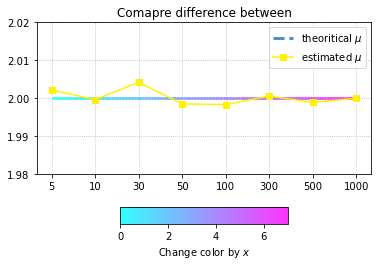

In [3]:
from scipy.stats import chi2 , norm
from matplotlib.collections import LineCollection
import numpy as np
import matplotlib.pyplot as plt
N = 10000
n = np.array([5, 10, 30, 50, 100, 300, 500, 1000])
df=2

mu , sigma = df , np.sqrt(df/n)
lst=np.zeros(len(n))

for i in range(len(n)):
    x=chi2.rvs(df=2,size=(N,n[i]))
    x_bar=np.mean(x)
    lst[i]=x_bar
x_1=np.arange(5,10,1)

y=norm.pdf(x_1.reshape(-1,1),loc=mu,scale=sigma)

fig , ax =plt.subplots()

plt.yticks([1.98,1.99,2,2.01,2.02])
plt.ylim(1.98,2.02)

lst_1=np.zeros(200)
x_2=np.linspace(0,7,200)

for i in range(200):
    lst_1[i]=df

#plt.hlines(y=mu,xmin=0,xmax=7,linestyle='dashed',color='r',label='theoritical $\mu$')
points = np.array([x_2, lst_1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(x_2.min(), x_2.max())
lc = LineCollection(segments, cmap='cool', linestyles="--", norm=norm,alpha=0.8)
# Set the values used for colormapping
lc.set_array(x_2)
lc.set_linewidth(3)
lc.set_linestyles('--')
lc.set_label('theoritical $\mu$')

line = ax.add_collection(lc)
fig.colorbar(line,ax=ax,label='Change color by $x$',aspect=10,shrink=0.5,orientation='horizontal')

plt.plot(n.astype('str'),lst,color="#fff101",marker='s',label='estimated $\mu$')
plt.yticks([1.98,1.99,2,2.01,2.02])
plt.ylim(1.98,2.02)
#ax.set_yticklabels(['1.98', '2', '2.02'])
#plt.xticks(n)
plt.grid(linestyle='dotted')
plt.legend()
plt.title('Comapre difference between')

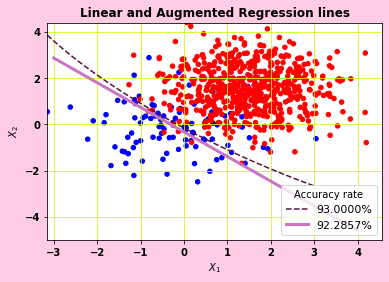

In [2]:
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression

def generate_data(n1,n2,m1,m2,Cov1,Cov2):

    mvn1 = multivariate_normal(mean = m1, cov = Cov1,seed=12 )
    mvn2 = multivariate_normal(mean = m2, cov = Cov2,seed=20 )
    A, B = mvn1.rvs(n1), mvn2.rvs(n2)
    X = np.vstack((A, B))
    y = np.hstack((np.zeros(n1), np.ones(n2)))
    return X,y

#參數設定
n1 , n2 = 100 , 600
m1 , m2 = [0,0] , [1.5,1.5]
Cov1=[[1,0],[0,1]]
Cov2=[[1,0],[0,1]]

X,y=generate_data(n1,n2,m1,m2,Cov1,Cov2)
#一般線性
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X[:,0:2], y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
x = np.array([-3, 4])
f11 = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat1 = Mdl.predict(X[:,0:2]) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
z=plt.plot(x, f11, lw=3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')

#---------------------------------------------------------------------------

X_input = np.hstack( (X[:,0:1], X[:,1:2], \
    X[:,0:1] * X[:,1:2],\
    X[:,0:1] ** 2, X[:,1:2] ** 2))

clf=sklearn.linear_model.LinearRegression()
clf.fit(X_input,y)
y_hat = clf.predict(X_input) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
x1=X[:,0:1]
x2=X[:,1:2]
coeffe=clf.coef_
intecep=clf.intercept_
f=(lambda x:
 intecep
+ coeffe[0] * x[0]
+ coeffe[1] * x[1]
+ coeffe[2] * x[0] * x[1]
+coeffe[3] * x[0] ** 2
+coeffe[4] * x[1] ** 2)

xx=np.linspace(x1.min(),3,100)
yy=np.linspace(-5,x2.max(),100)
X1,Y1=np.meshgrid(xx,yy)
Z=f([X1,Y1])
contours=plt.contour(X1,Y1,Z, levels = [0.5],colors='#580F41',linestyles='--')
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))
artists,_ = contours.legend_elements()          
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=11)
plt.title('Linear and Augmented Regression lines',fontweight='semibold')
colors = ['blue' if i == 0 else 'red' for i in y]
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.scatter(X[:,0], X[:,1],c=colors, s=20, marker="o")
# plt.savefig('hw4data1.pdf',format='pdf')
plt.show()